In [42]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Análisis Exploratorio de Datos - Accidentes de Tránsito

Este notebook contiene un análisis exploratorio de dos datasets:
1. **Accidents_de_trànsit_amb_morts_o_ferits_greus_a_Catalunya.csv**: Accidentes con muertos o heridos graves en Catalunya
2. **Accidents_AP7.csv**: Accidentes en la autopista AP7

## 1. Carga de Datos

In [43]:
# Cargar los datasets
df_catalunya = pd.read_csv('data/Accidents_de_tr_nsit_amb_morts_o_ferits_greus_a_Catalunya.csv')
df_ap7 = pd.read_csv('data/Accidents_AP7.csv')

print(f"Dataset Catalunya: {df_catalunya.shape[0]} filas, {df_catalunya.shape[1]} columnas")
print(f"Dataset AP7: {df_ap7.shape[0]} filas, {df_ap7.shape[1]} columnas")

Dataset Catalunya: 24478 filas, 58 columnas
Dataset AP7: 530 filas, 32 columnas


## 2. Información General de los Datasets

In [44]:
display(df_catalunya.head())

,Any,zona,data,via,pk,nomMunicipi,nomComarca,nomProvincia,F_MORTS,F_FERITS_GREUS,...,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hora,grupHora,tipusAccident,tipusDia
0,2010,Zona urbana,25/01/2010,SE,999999,Cànoves i Samalús,Vallès Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,"99,9",Lleida,Segrià,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,"708,7",Fornells de la Selva,Gironès,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999,Barcelona,Barcelonès,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999,Badalona,Barcelonès,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div


In [45]:
df_catalunya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24478 entries, 0 to 24477
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Any                        24478 non-null  int64  
 1   zona                       24478 non-null  object 
 2   data                       24478 non-null  object 
 3   via                        24478 non-null  object 
 4   pk                         24477 non-null  object 
 5   nomMunicipi                24478 non-null  object 
 6   nomComarca                 24478 non-null  object 
 7   nomProvincia               24478 non-null  object 
 8   F_MORTS                    24478 non-null  int64  
 9   F_FERITS_GREUS             24478 non-null  int64  
 10  F_FERITS_LLEUS             24478 non-null  int64  
 11  F_VICTIMES                 24478 non-null  int64  
 12  F_UNITATS_IMPLICADES       24478 non-null  int64  
 13  F_VIANANTS_IMPLICADES      24478 non-null  int

In [46]:
display(df_ap7.head())

,Any,data,hora,grupHora,tipusDia,grupDiaLab,via,pk,nomMunicipi,nomComarca,...,D_TIPUS_VIA,D_SUBTIPUS_TRAM,D_TRACAT_ALTIMETRIC,D_SENTITS_VIA,D_INTER_SECCIO,D_REGULACIO_PRIORITAT,D_TITULARITAT_VIA,D_CARRIL_ESPECIAL,D_FUNC_ESP_VIA,D_GRAVETAT
0,2010,19/06/2010,5.30,Nit,dis,CapDeSetmana,AP-7,138,Mollet del Vallès,Vallès Oriental,...,Carretera convencional,Intersecció en T o Y,Pla,Doble sentit,En secció,Senyal Stop o cedeix pas,Estatal,No n'hi ha,Sense funció especial,Accident greu
1,2010,04/09/2010,13.20,Matí,dis,CapDeSetmana,AP-7,"99,6",Avià,Berguedà,...,Autopista,Giratòria,Pla,Doble sentit,En secció,Sols marques viàries (inclou pas vianants),Estatal,No n'hi ha,Sense funció especial,Accident greu
2,2010,05/09/2010,7.54,Matí,dg,CapDeSetmana,AP-7,"171,5",Martorell,Baix Llobregat,...,Carretera convencional,Intersecció en T o Y,Pla,Doble sentit,En secció,Semàfor,Estatal,Altres,Sense funció especial,Accident mortal
3,2010,27/07/2010,20.08,Tarda,dill-dij,Feiners,AP-7,"336,8",Ulldecona,Montsià,...,Carretera convencional,Encreuament o intersecció en X o +,Pla,Doble sentit,En secció,Sols norma prioritat de pas,Estatal,No n'hi ha,Sense funció especial,Accident mortal
4,2010,01/04/2010,5.30,Nit,dill-dij,Feiners,AP-7,"117,5",Llinars del Vallès,Vallès Oriental,...,Carretera convencional,Giratòria,Pla,Doble sentit,En secció,Semàfor,Estatal,No n'hi ha,Sense funció especial,Accident mortal


In [47]:
df_ap7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Any                       530 non-null    int64  
 1   data                      530 non-null    object 
 2   hora                      530 non-null    float64
 3   grupHora                  530 non-null    object 
 4   tipusDia                  530 non-null    object 
 5   grupDiaLab                530 non-null    object 
 6   via                       530 non-null    object 
 7   pk                        530 non-null    object 
 8   nomMunicipi               530 non-null    object 
 9   nomComarca                530 non-null    object 
 10  nomProvincia              530 non-null    object 
 11  zona                      530 non-null    object 
 12  D_SUBZONA                 530 non-null    object 
 13  D_CLIMATOLOGIA            530 non-null    object 
 14  D_BOIRA   

## 3. Valores Únicos de Columnas Clave

In [48]:
# Columnas básicas + todas las que empiezan con 'D_'
columnas_basicas = ['zona', 'tipusAccident', 'tipusDia', 'grupHora']
columnas_d = [col for col in df_catalunya.columns if col.startswith('D_')]
columnas_clave_cat = columnas_basicas + columnas_d

for col in columnas_clave_cat:
    if col in df_catalunya.columns:
        valores_unicos = df_catalunya[col].unique()
        print(f"\n{col}:")
        print(f"  Número de valores únicos: {len(valores_unicos)}")
        print(f"  Valores: {valores_unicos}")


zona:
  Número de valores únicos: 2
  Valores: ['Zona urbana' 'Carretera']

tipusAccident:
  Número de valores únicos: 7
  Valores: ['Col.lisió de vehicles en marxa'
 'Sortida de la calcada sense especificar' 'Bolcada a la calcada'
 'Atropellament' "Col.lisió d'un vehicle contra un obstacle de la calcada"
 'Altres' 'Sense especificar']

tipusDia:
  Número de valores únicos: 4
  Valores: ['dill-dij' 'dg' 'dis' 'div']

grupHora:
  Número de valores únicos: 3
  Valores: ['Nit' 'Tarda' 'Matí']

D_ACC_AMB_FUGA:
  Número de valores únicos: 3
  Valores: ['No' 'Si' 'Sense Especificar']

D_BOIRA:
  Número de valores únicos: 2
  Valores: ["No n'hi ha" 'Si']

D_CARACT_ENTORN:
  Número de valores únicos: 6
  Valores: ['Desmunt' 'A nivell' 'Sense Especificar' 'Mixt' 'Terraplé' nan]

D_CARRIL_ESPECIAL:
  Número de valores únicos: 14
  Valores: ["No n'hi ha" 'Carril habilitat en sentit contrari habitual'
 'Habilitació voral/carril addicional' 'Carril lent' "Carril d'alentiment"
 'Altres' 'Carril bus

In [49]:
columnas_basicas = ['tipusDia', 'grupHora']
columnas_d = [col for col in df_ap7.columns if col.startswith('D_')]
columnas_clave_ap7 = columnas_basicas + columnas_d

for col in columnas_clave_ap7:
    if col in df_ap7.columns:
        valores_unicos = df_ap7[col].unique()
        print(f"\n{col}:")
        print(f"  Número de valores únicos: {len(valores_unicos)}")
        print(f"  Valores: {valores_unicos}")


tipusDia:
  Número de valores únicos: 4
  Valores: ['dis' 'dg' 'dill-dij' 'div']

grupHora:
  Número de valores únicos: 3
  Valores: ['Nit' 'Matí' 'Tarda']

D_SUBZONA:
  Número de valores únicos: 1
  Valores: ['Carretera']

D_CLIMATOLOGIA:
  Número de valores únicos: 3
  Valores: ['Bon temps' 'Pluja dèbil' 'Pluja forta']

D_BOIRA:
  Número de valores únicos: 2
  Valores: ["No n'hi ha" 'Si']

D_VENT:
  Número de valores únicos: 3
  Valores: ['Calma, vent molt suau' 'Vent moderat' 'Vent fort']

D_LLUMINOSITAT:
  Número de valores únicos: 6
  Valores: ['De nit, sense llum artificial' 'De dia, dia clar' 'De dia, dia fosc'
 'Alba o capvespre' 'De nit, il·luminació artificial suficient'
 'De nit, il·luminació artificial insuficient']

D_SUPERFICIE:
  Número de valores únicos: 3
  Valores: ['Sec i net' 'Mullat' 'Relliscós']

D_CARACT_ENTORN:
  Número de valores únicos: 5
  Valores: ['Desmunt' 'A nivell' 'Terraplé' 'Mixt' 'Sense Especificar']

D_CIRCULACIO_MESURES_ESP:
  Número de valores úni

## 4. Estadísticas Descriptivas

In [50]:
# Estadísticas de víctimas - Dataset Catalunya
columnas_victimas = ['F_MORTS', 'F_FERITS_GREUS', 'F_FERITS_LLEUS', 'F_VICTIMES']
print(df_catalunya[columnas_victimas].describe())

            F_MORTS  F_FERITS_GREUS  F_FERITS_LLEUS    F_VICTIMES
count  24478.000000    24478.000000    24478.000000  24478.000000
mean       0.138696        0.997345        0.393537      1.529578
std        0.396296        0.526723        1.010709      1.226088
min        0.000000        0.000000        0.000000      1.000000
25%        0.000000        1.000000        0.000000      1.000000
50%        0.000000        1.000000        0.000000      1.000000
75%        0.000000        1.000000        0.000000      2.000000
max       13.000000       23.000000       32.000000     49.000000


In [51]:
# Distribución de años
print("\nDataset Catalunya:")
print(df_catalunya['Any'].value_counts().sort_index())
print("\nDataset AP7:")
print(df_ap7['Any'].value_counts().sort_index())


Dataset Catalunya:
2010    1984
2011    1868
2012    1950
2013    1902
2014    1912
2015    1901
2016    1793
2017    1719
2018    1745
2019    1732
2020    1208
2021    1448
2022    1584
2023    1732
Name: Any, dtype: int64

Dataset AP7:
2010    47
2011    35
2012    53
2013    34
2014    40
2015    34
2016    31
2017    30
2018    40
2019    32
2020    23
2021    30
2022    55
2023    46
Name: Any, dtype: int64


## 5. Visualizaciones - Dataset Catalunya

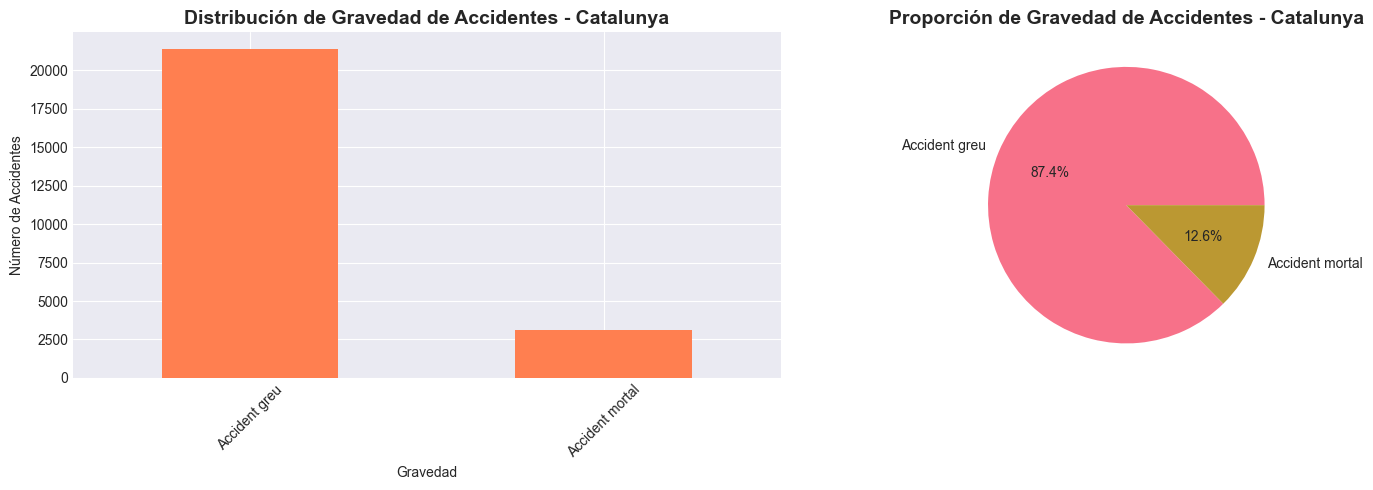

In [52]:
# Distribución de gravedad de accidentes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
df_catalunya['D_GRAVETAT'].value_counts().plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Distribución de Gravedad de Accidentes - Catalunya', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gravedad')
axes[0].set_ylabel('Número de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de pastel
df_catalunya['D_GRAVETAT'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Proporción de Gravedad de Accidentes - Catalunya', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

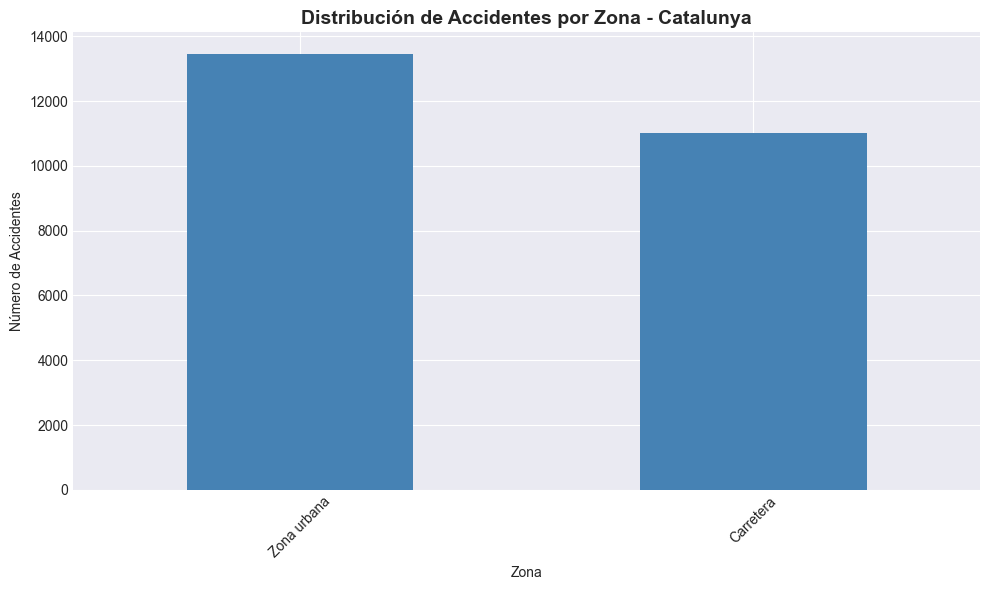

In [53]:
# Accidentes por zona
plt.figure(figsize=(10, 6))
df_catalunya['zona'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribución de Accidentes por Zona - Catalunya', fontsize=14, fontweight='bold')
plt.xlabel('Zona')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

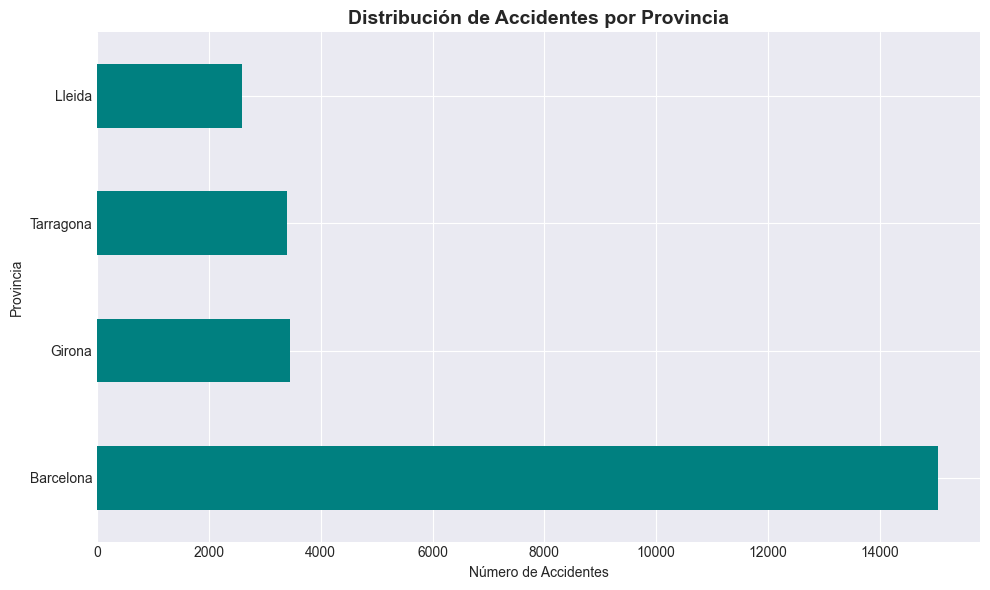

In [54]:
# Accidentes por provincia
plt.figure(figsize=(10, 6))
df_catalunya['nomProvincia'].value_counts().plot(kind='barh', color='teal')
plt.title('Distribución de Accidentes por Provincia', fontsize=14, fontweight='bold')
plt.xlabel('Número de Accidentes')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()

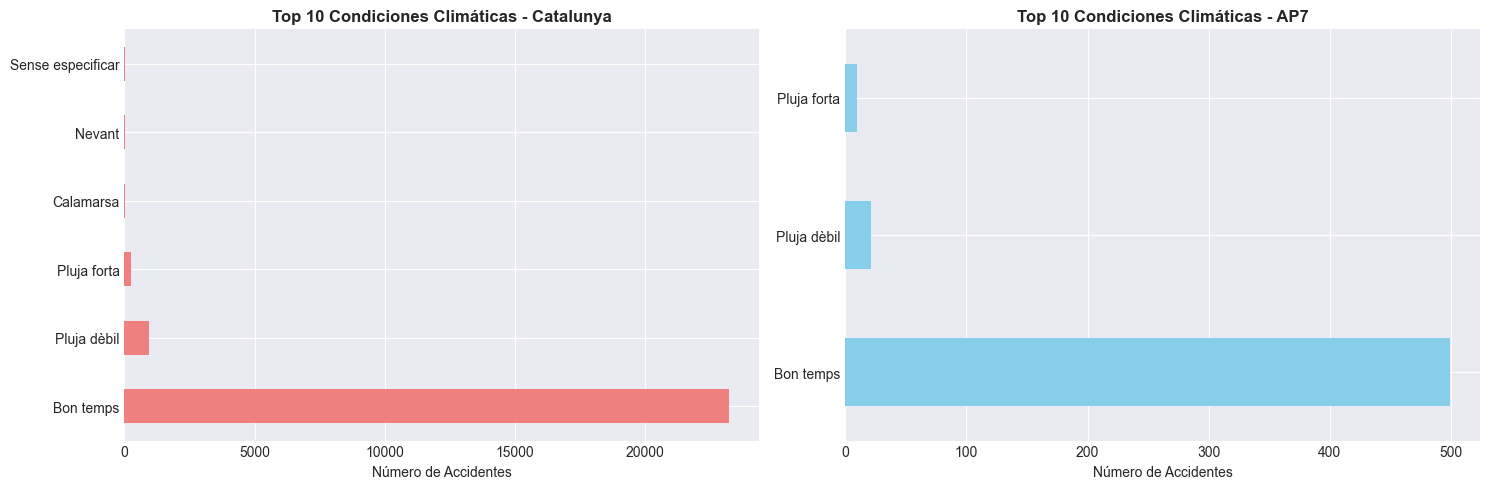

In [55]:
# Condiciones climáticas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Catalunya
df_catalunya['D_CLIMATOLOGIA'].value_counts().head(10).plot(kind='barh', ax=axes[0], color='lightcoral')
axes[0].set_title('Top 10 Condiciones Climáticas - Catalunya', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Accidentes')

# AP7
df_ap7['D_CLIMATOLOGIA'].value_counts().head(10).plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Condiciones Climáticas - AP7', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Accidentes')

plt.tight_layout()
plt.show()

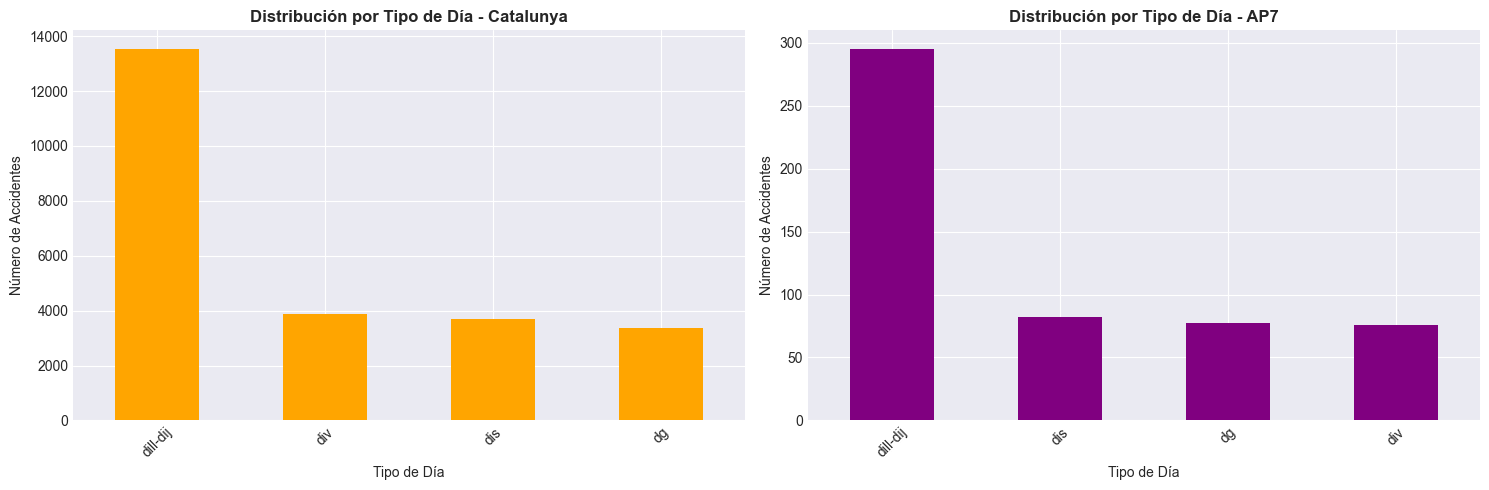

In [56]:
# Tipo de día
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Catalunya
df_catalunya['tipusDia'].value_counts().plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Distribución por Tipo de Día - Catalunya', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Día')
axes[0].set_ylabel('Número de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# AP7
df_ap7['tipusDia'].value_counts().plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Distribución por Tipo de Día - AP7', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Día')
axes[1].set_ylabel('Número de Accidentes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

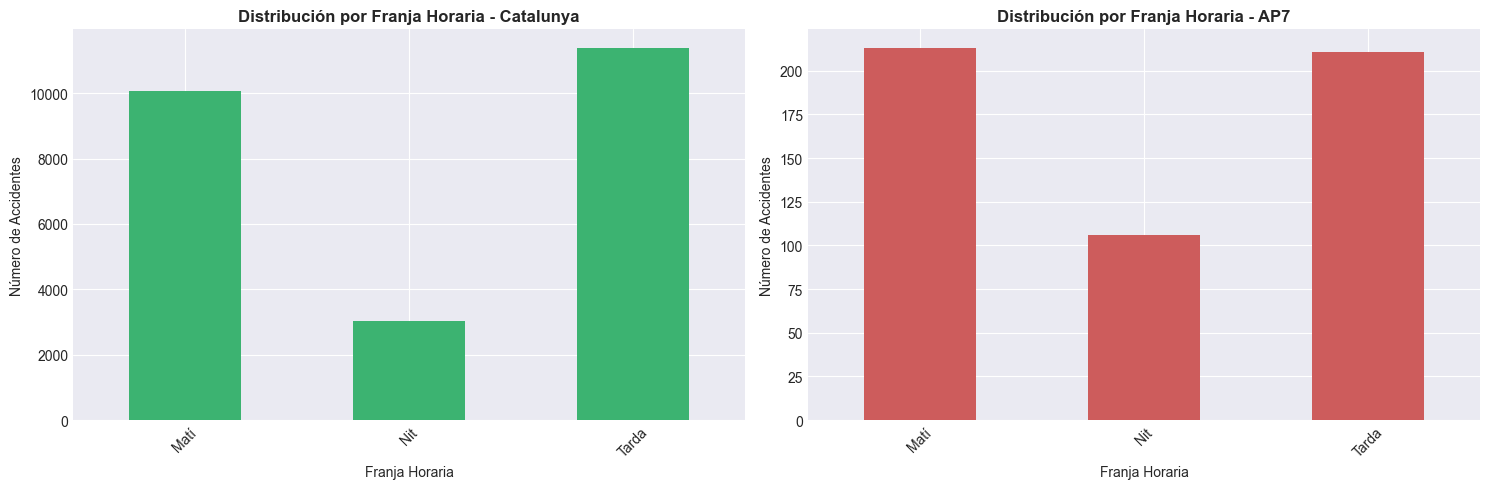

In [57]:
# Franja horaria
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Catalunya
df_catalunya['grupHora'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='mediumseagreen')
axes[0].set_title('Distribución por Franja Horaria - Catalunya', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Número de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# AP7
df_ap7['grupHora'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='indianred')
axes[1].set_title('Distribución por Franja Horaria - AP7', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Franja Horaria')
axes[1].set_ylabel('Número de Accidentes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

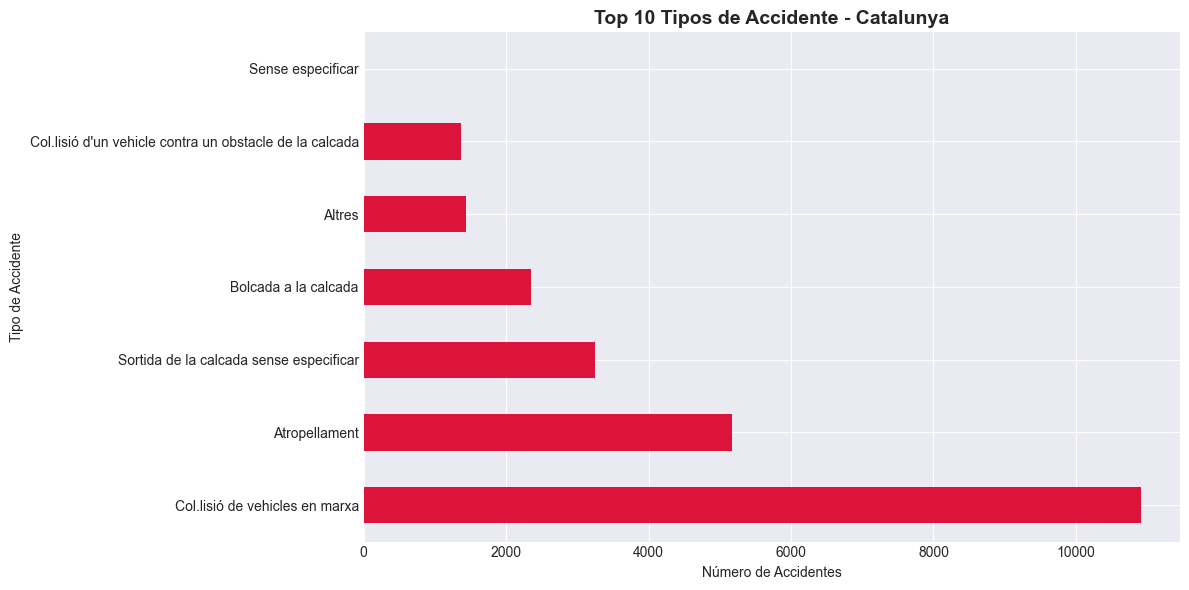

In [58]:
# Tipo de accidente - Catalunya
plt.figure(figsize=(12, 6))
df_catalunya['tipusAccident'].value_counts().head(10).plot(kind='barh', color='crimson')
plt.title('Top 10 Tipos de Accidente - Catalunya', fontsize=14, fontweight='bold')
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Accidente')
plt.tight_layout()
plt.show()

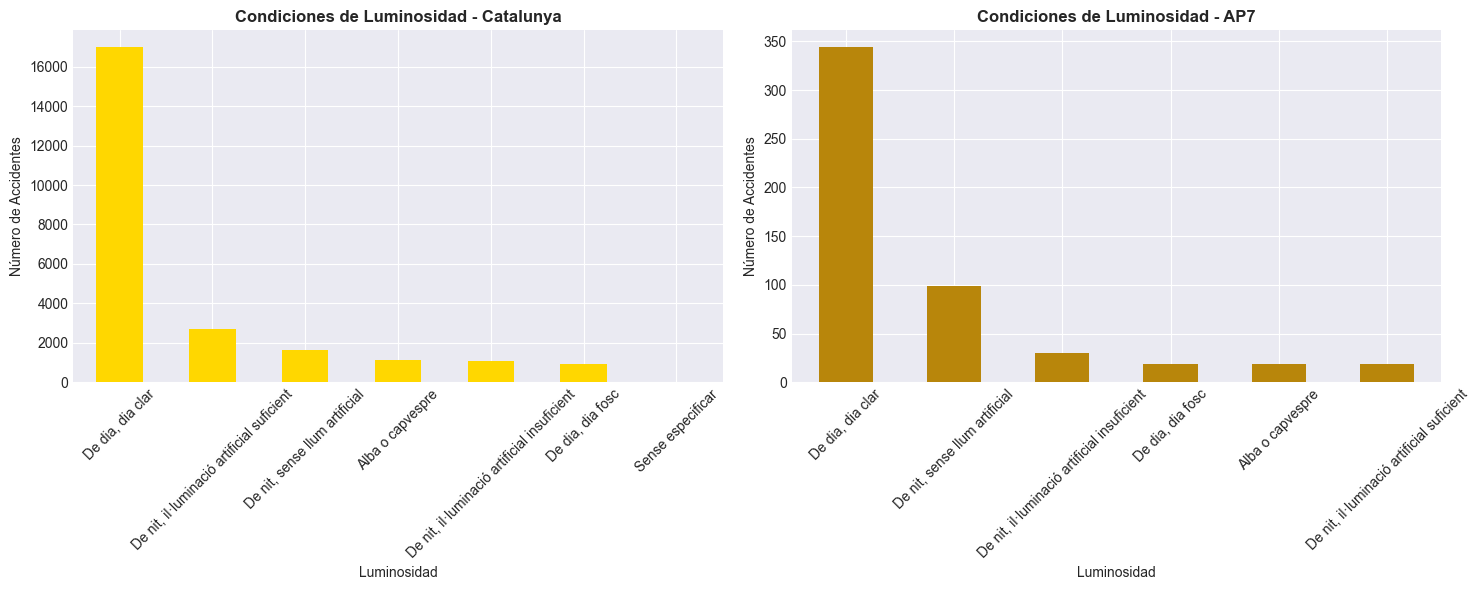

In [59]:
# Condiciones de luminosidad
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Catalunya
df_catalunya['D_LLUMINOSITAT'].value_counts().plot(kind='bar', ax=axes[0], color='gold')
axes[0].set_title('Condiciones de Luminosidad - Catalunya', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Luminosidad')
axes[0].set_ylabel('Número de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

# AP7
df_ap7['D_LLUMINOSITAT'].value_counts().plot(kind='bar', ax=axes[1], color='darkgoldenrod')
axes[1].set_title('Condiciones de Luminosidad - AP7', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Luminosidad')
axes[1].set_ylabel('Número de Accidentes')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Análisis Temporal

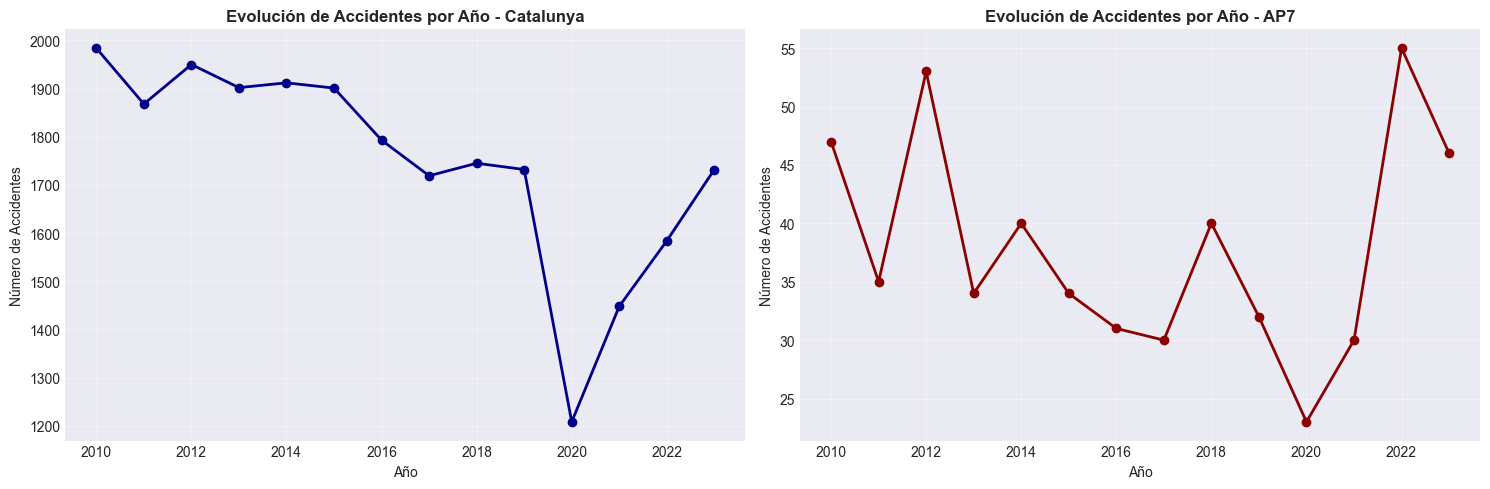

In [60]:
# Tendencia por año
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Catalunya
df_catalunya['Any'].value_counts().sort_index().plot(kind='line', marker='o', ax=axes[0], color='darkblue', linewidth=2)
axes[0].set_title('Evolución de Accidentes por Año - Catalunya', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Número de Accidentes')
axes[0].grid(True, alpha=0.3)

# AP7
df_ap7['Any'].value_counts().sort_index().plot(kind='line', marker='o', ax=axes[1], color='darkred', linewidth=2)
axes[1].set_title('Evolución de Accidentes por Año - AP7', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Número de Accidentes')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Análisis de Víctimas (Catalunya)

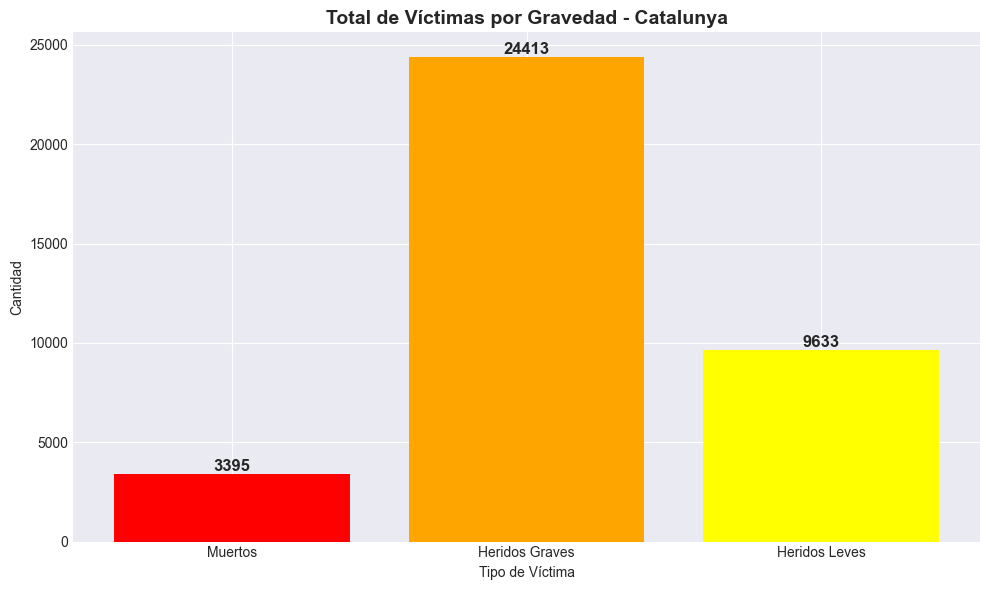

In [61]:
# Distribución de víctimas
victimas_data = {
    'Muertos': df_catalunya['F_MORTS'].sum(),
    'Heridos Graves': df_catalunya['F_FERITS_GREUS'].sum(),
    'Heridos Leves': df_catalunya['F_FERITS_LLEUS'].sum()
}

plt.figure(figsize=(10, 6))
plt.bar(victimas_data.keys(), victimas_data.values(), color=['red', 'orange', 'yellow'])
plt.title('Total de Víctimas por Gravedad - Catalunya', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# Añadir valores en las barras
for i, (k, v) in enumerate(victimas_data.items()):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

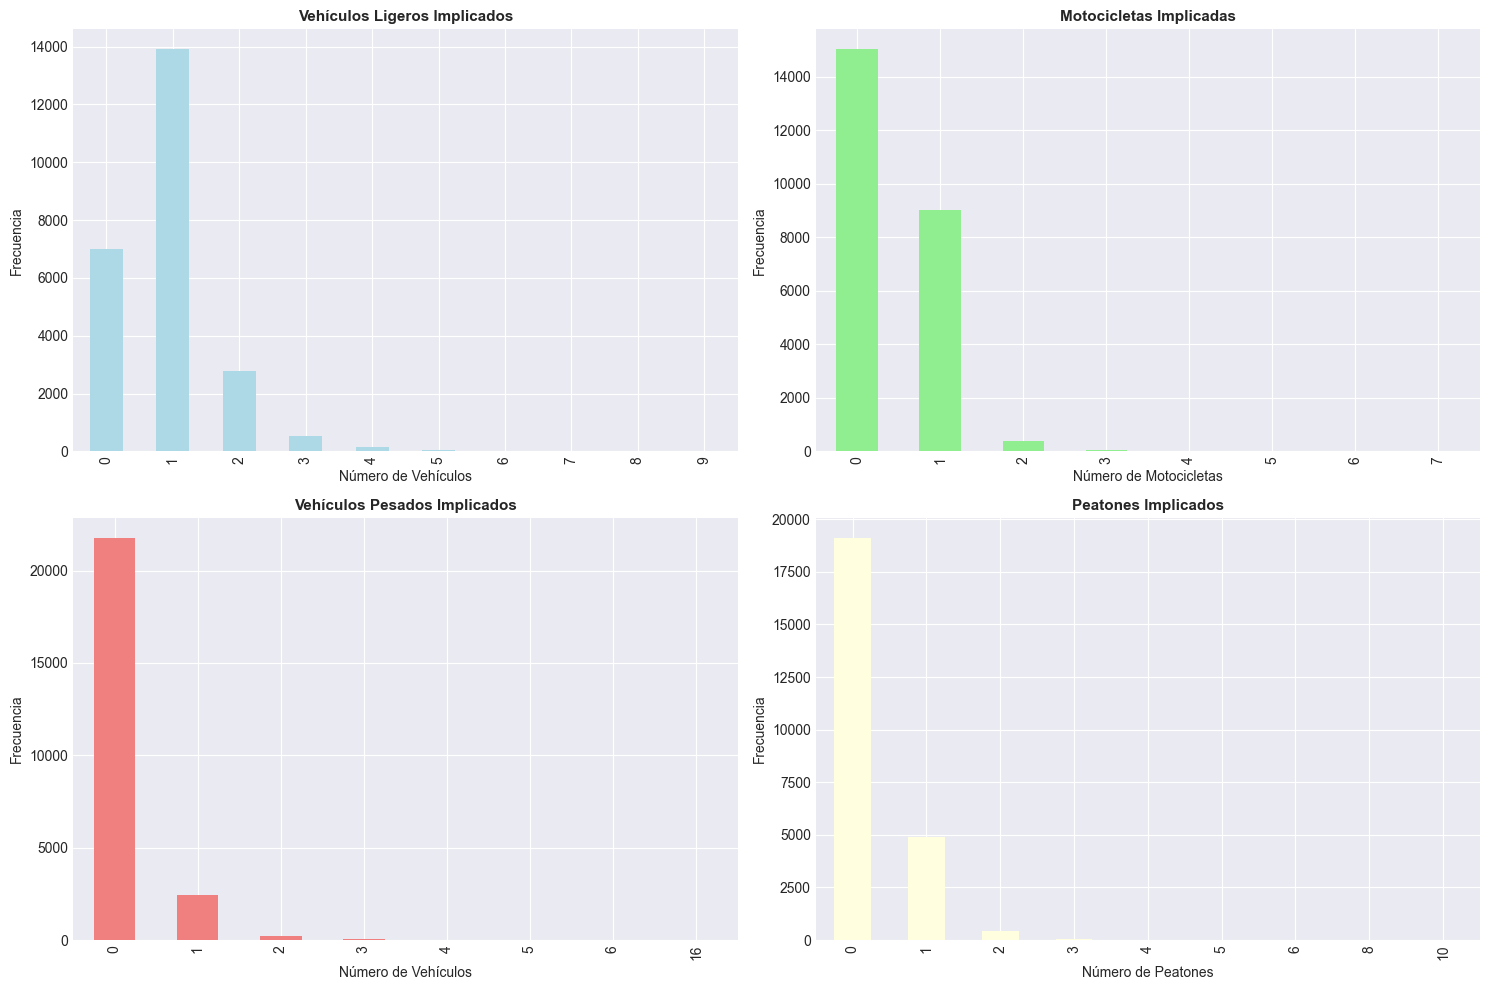

In [69]:
# Vehículos implicados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Vehículos ligeros
df_catalunya['F_VEH_LLEUGERS_IMPLICADES'].value_counts().head(10).sort_index().plot(
    kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Vehículos Ligeros Implicados', fontsize=11, fontweight='bold')
axes[0,0].set_xlabel('Número de Vehículos')
axes[0,0].set_ylabel('Frecuencia')

# Motocicletas
df_catalunya['F_MOTOCICLETES_IMPLICADES'].value_counts().head(10).sort_index().plot(
    kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Motocicletas Implicadas', fontsize=11, fontweight='bold')
axes[0,1].set_xlabel('Número de Motocicletas')
axes[0,1].set_ylabel('Frecuencia')

# Vehículos pesados
df_catalunya['F_VEH_PESANTS_IMPLICADES'].value_counts().head(10).sort_index().plot(
    kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Vehículos Pesados Implicados', fontsize=11, fontweight='bold')
axes[1,0].set_xlabel('Número de Vehículos')
axes[1,0].set_ylabel('Frecuencia')

# Peatones
df_catalunya['F_VIANANTS_IMPLICADES'].value_counts().head(10).sort_index().plot(
    kind='bar', ax=axes[1,1], color='lightyellow')
axes[1,1].set_title('Peatones Implicados', fontsize=11, fontweight='bold')
axes[1,1].set_xlabel('Número de Peatones')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 8. Análisis Comparativo entre Datasets

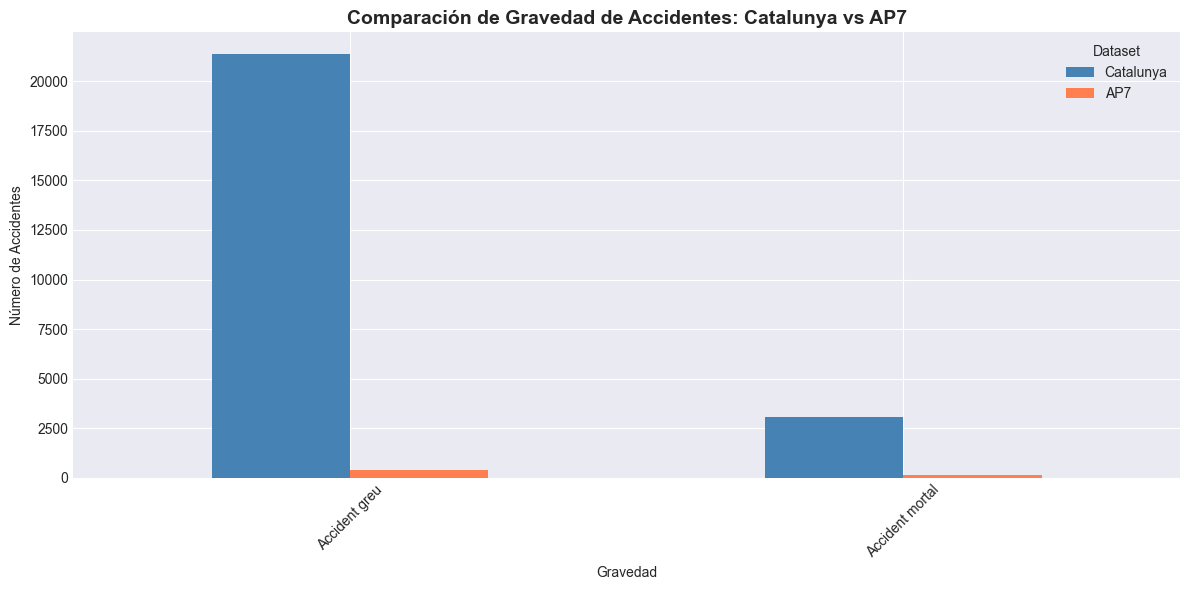


Porcentajes de gravedad:

Catalunya:
Accident greu      87.36
Accident mortal    12.64
Name: D_GRAVETAT, dtype: float64

AP7:
Accident greu      72.26
Accident mortal    27.74
Name: D_GRAVETAT, dtype: float64


In [63]:
# Comparación de gravedad
gravedad_cat = df_catalunya['D_GRAVETAT'].value_counts()
gravedad_ap7 = df_ap7['D_GRAVETAT'].value_counts()

# Crear DataFrame comparativo
comparacion_gravedad = pd.DataFrame({
    'Catalunya': gravedad_cat,
    'AP7': gravedad_ap7
}).fillna(0)

comparacion_gravedad.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'coral'])
plt.title('Comparación de Gravedad de Accidentes: Catalunya vs AP7', fontsize=14, fontweight='bold')
plt.xlabel('Gravedad')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

print("\nPorcentajes de gravedad:")
print("\nCatalunya:")
print((gravedad_cat / gravedad_cat.sum() * 100).round(2))
print("\nAP7:")
print((gravedad_ap7 / gravedad_ap7.sum() * 100).round(2))

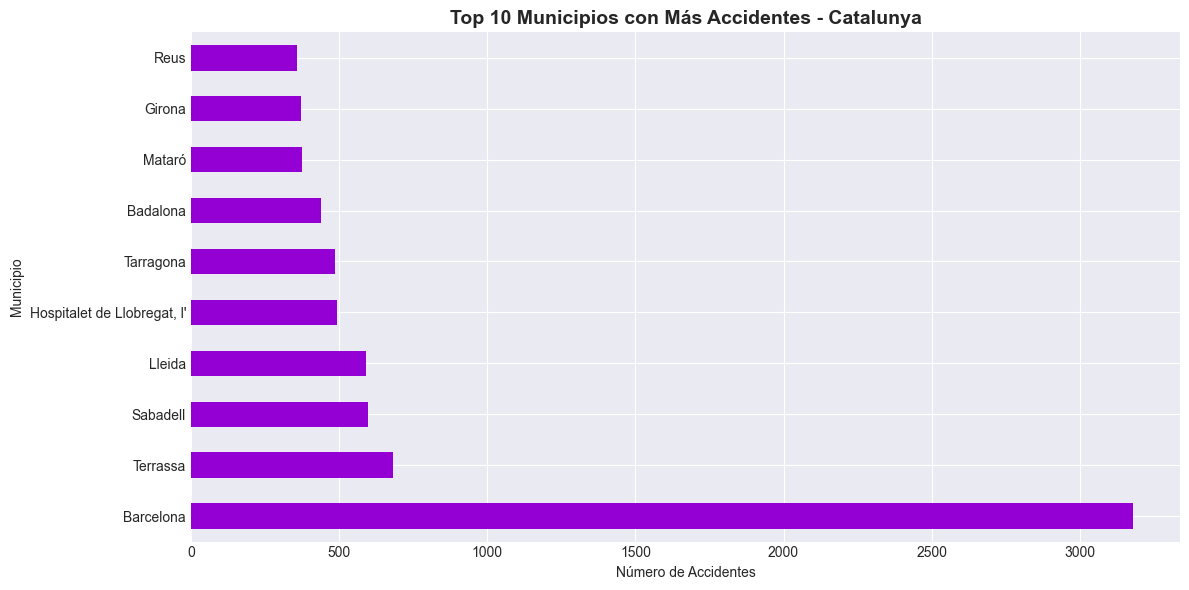

In [64]:
# Top 10 municipios con más accidentes en Catalunya
plt.figure(figsize=(12, 6))
df_catalunya['nomMunicipi'].value_counts().head(10).plot(kind='barh', color='darkviolet')
plt.title('Top 10 Municipios con Más Accidentes - Catalunya', fontsize=14, fontweight='bold')
plt.xlabel('Número de Accidentes')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()

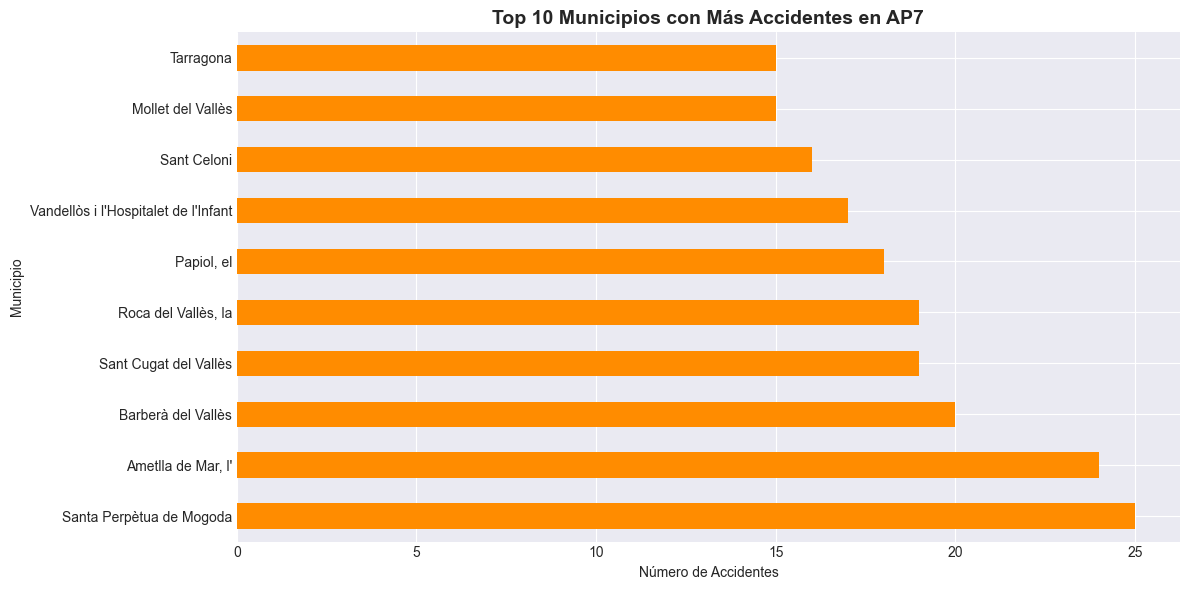

In [65]:
# Top 10 municipios con más accidentes en AP7
plt.figure(figsize=(12, 6))
df_ap7['nomMunicipi'].value_counts().head(10).plot(kind='barh', color='darkorange')
plt.title('Top 10 Municipios con Más Accidentes en AP7', fontsize=14, fontweight='bold')
plt.xlabel('Número de Accidentes')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()

## 9. Resumen de Hallazgos

In [70]:
print("="*80)
print("RESUMEN DE ANÁLISIS EXPLORATORIO")
print("="*80)

print(f"\n DATASET CATALUNYA:")
print(f"   - Total de accidentes: {len(df_catalunya):,}")
print(f"   - Período: {df_catalunya['Any'].min()} - {df_catalunya['Any'].max()}")
print(f"   - Total muertos: {df_catalunya['F_MORTS'].sum():,}")
print(f"   - Total heridos graves: {df_catalunya['F_FERITS_GREUS'].sum():,}")
print(f"   - Total heridos leves: {df_catalunya['F_FERITS_LLEUS'].sum():,}")
print(f"   - Provincia con más accidentes: {df_catalunya['nomProvincia'].value_counts().index[0]}")
print(f"   - Municipio con más accidentes: {df_catalunya['nomMunicipi'].value_counts().index[0]}")
print(f"   - Tipo de accidente más común: {df_catalunya['tipusAccident'].value_counts().index[0]}")

print(f"\n DATASET AP7:")
print(f"   - Total de accidentes: {len(df_ap7):,}")
print(f"   - Período: {df_ap7['Any'].min()} - {df_ap7['Any'].max()}")
print(f"   - Gravedad más común: {df_ap7['D_GRAVETAT'].value_counts().index[0]}")
print(f"   - Municipio con más accidentes: {df_ap7['nomMunicipi'].value_counts().index[0]}")

print(f"\n OBSERVACIONES CLAVE:")
print(f"   - Condición climática predominante en ambos datasets: {df_catalunya['D_CLIMATOLOGIA'].value_counts().index[0]}")
print(f"   - La mayoría de accidentes ocurren en días: {df_catalunya['tipusDia'].value_counts().index[0]}")
print(f"   - Franja horaria con más accidentes en Catalunya: {df_catalunya['grupHora'].value_counts().index[0]}")
print(f"   - Franja horaria con más accidentes en AP7: {df_ap7['grupHora'].value_counts().index[0]}")

print("\n" + "="*80)

RESUMEN DE ANÁLISIS EXPLORATORIO

 DATASET CATALUNYA:
   - Total de accidentes: 24,478
   - Período: 2010 - 2023
   - Total muertos: 3,395
   - Total heridos graves: 24,413
   - Total heridos leves: 9,633
   - Provincia con más accidentes: Barcelona
   - Municipio con más accidentes: Barcelona
   - Tipo de accidente más común: Col.lisió de vehicles en marxa

 DATASET AP7:
   - Total de accidentes: 530
   - Período: 2010 - 2023
   - Gravedad más común: Accident greu
   - Municipio con más accidentes: Santa Perpètua de Mogoda

 OBSERVACIONES CLAVE:
   - Condición climática predominante en ambos datasets: Bon temps
   - La mayoría de accidentes ocurren en días: dill-dij
   - Franja horaria con más accidentes en Catalunya: Tarda
   - Franja horaria con más accidentes en AP7: Matí

